In [215]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [252]:
def plot_ix(data):
    data = data.set_index('Date')
    
    man1 = data[data.IX == 'man1']
    six = data[data.IX == 'six']
    nva1 = data[data.IX == 'nva1']
    sco1 = data[data.IX == 'sco1']
    car1 = data[data.IX == 'car1']
    lon1 = data[data.IX == 'lon1']
    lon2 = data[data.IX == 'lon2']
    jed1 = data[data.IX == 'jed1']
    car1 = data[data.IX == 'car1']
    peering = data[data.IX == 'peering.cz']
    mskix = data[data.IX == 'mskix']
    ix_duesseldorf = data[data.IX == 'ix_duesseldorf']
    ix_frankfurt = data[data.IX == 'ix_frankfurt']
    ix_hamburg = data[data.IX == 'ix_hamburg']
    ix_munich = data[data.IX == 'ix_munich']
    

    #print(data.loc['2019-11','bitrate':'IX'])

    time_frame='2019'

    plt.figure(figsize=(20,20))
    plt.plot( man1.loc[time_frame,'bitrate'], 'o', label='man1')
    plt.plot( six.loc[time_frame,'bitrate'], 'o', label='six')
    plt.plot( nva1.loc[time_frame,'bitrate'], 'o', label='nva1')
    plt.plot( sco1.loc[time_frame,'bitrate'], 'o', label='sco1')
    plt.plot( lon1.loc[time_frame,'bitrate'], 'o', label='lon1')
    plt.plot( lon2.loc[time_frame,'bitrate'], 'o', label='lon2')
    plt.plot( jed1.loc[time_frame,'bitrate'], 'o', label='jed1')
    plt.plot( car1.loc[time_frame,'bitrate'], 'o', label='car1')
    plt.plot( peering.loc[time_frame,'bitrate'], 'o', label='peering')
    plt.plot( mskix.loc[time_frame,'bitrate'], 'o',label='mskix' )
    plt.plot( ix_duesseldorf.loc[time_frame,'bitrate'], 'o', label='ix_duesseldorf')
    plt.plot( ix_frankfurt.loc[time_frame,'bitrate'], 'o', label='ix_frankfurt')
    plt.plot( ix_hamburg.loc[time_frame,'bitrate'], 'o', label='ix_hamburg')
    plt.plot( ix_munich.loc[time_frame,'bitrate'], 'o', label='ix_Munich')
    #plt.yscale('log')     
    plt.legend()
    plt.show()
    print('done')

In [310]:

# os.chdir(os.path.dirname(os.path.abspath(__file__)))
sns.set(rc={'figure.figsize' : (11, 4)})
RESOURC_PATH = '../../res/ix'
DECIX_PATH = '../../res/de-cix/processed'

# read Dataframe Date as 
data =pd.read_csv(os.path.join(RESOURC_PATH, 'all_IX' + '.csv'), \
                  parse_dates = ['Date'], infer_datetime_format=True, \
                  index_col = 0, dtype={'type':'category','IX':'category'})
# read Datafram from DE-CIX
with os.scandir(DECIX_PATH) as dirs:
    for entry in dirs:
        df_inter = pd.read_csv(os.path.join(DECIX_PATH, entry.name), \
                               parse_dates = ['Date'], infer_datetime_format=True, \
                               index_col = 0, dtype={'type':'category','IX':'category'})
        data = data.append(df_inter, ignore_index = True)
        
# Define as category
data.type = data.type.astype('category')
data.IX = data.IX.astype('category')
        
# remember which category is which datacenter
IX_names = data.IX.cat.categories;
# we want just the avg
data = data.drop(labels = data[data.type == 'max'].index)
data = data.drop(columns = ['type'], axis = 1)
data = data.drop(data.loc[data.loc[:,'Date'] < '2017-07'].index)
data = data.drop(data.loc[data.loc[:,'IX'] =='jed1'].index)
data = data.drop(data.loc[data.loc[:,'IX'] =='sco1'].index) 
data = data.drop(data.loc[data.loc[:,'IX'] =='car1'].index)
data = data.drop(data.loc[data.loc[:,'IX'] =='nva1'].index)
data = data.drop(data.loc[data.loc[:,'IX'] =='man1'].index) 
data = data.drop(data.loc[data.loc[:,'IX'] =='ix_munich'].index)
# set index Date as Datetime
# data = data.set_index('Date')
#visualize

#plot_ix(data)


car1
ix_dusseldorf
ix_frankfurt
ix_hamburg
ix_munich
jed1
lon1
lon2
man1
mskix
nva1
peering.cz
sco1
six


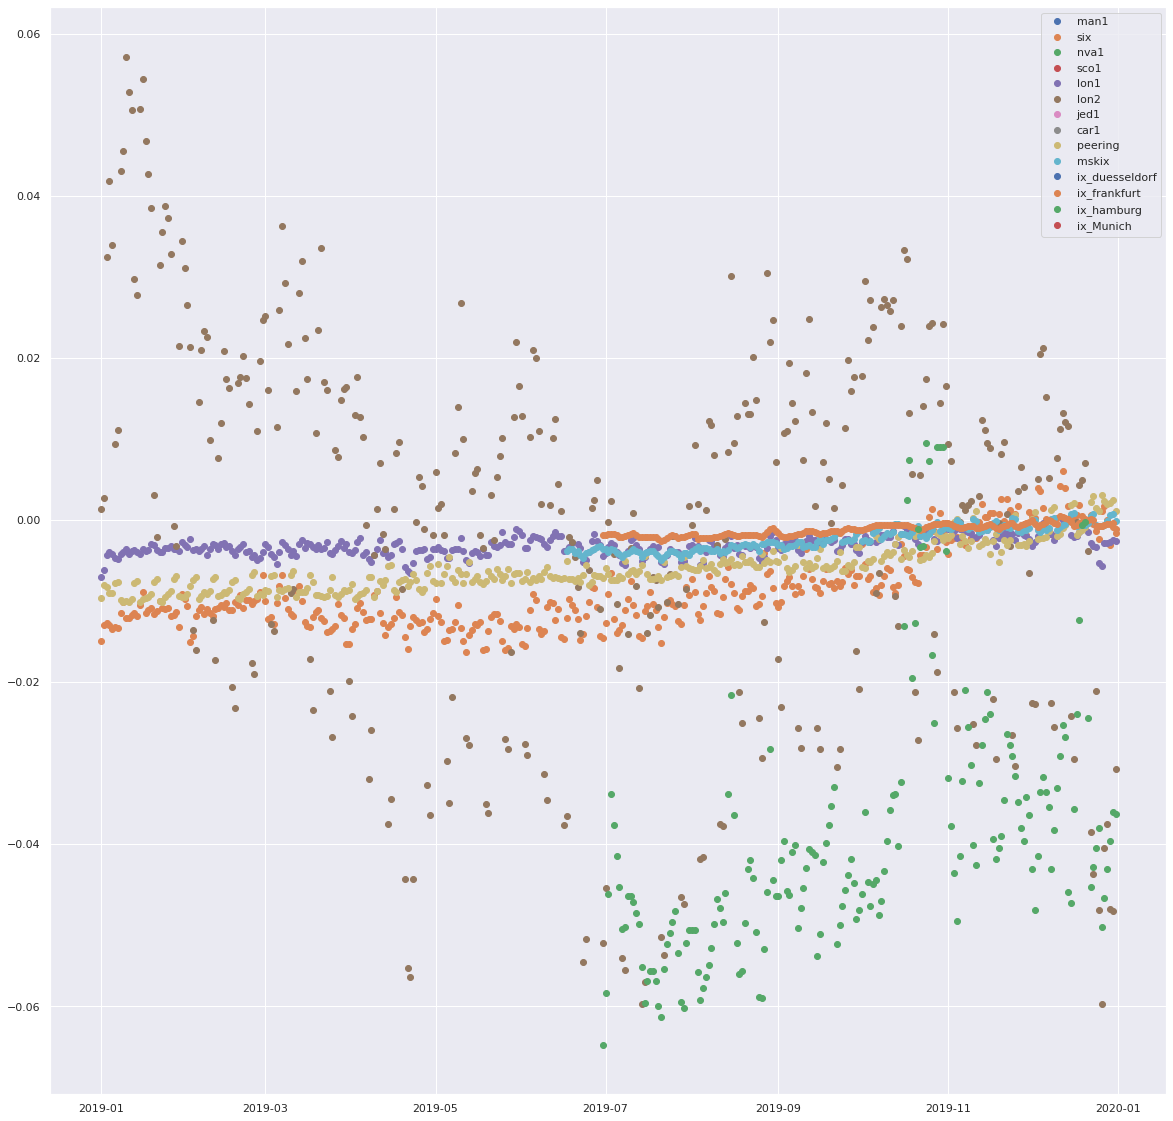

done
Empty DataFrame
Columns: [Timestamp, Date, bitrate, IX]
Index: []
Empty DataFrame
Columns: [Timestamp, Date, bitrate, IX]
Index: []


In [311]:
scaler = StandardScaler(with_std=False)
data.bitrate=data.bitrate/1e9

for i in data.IX.cat.categories:
    print(i)
    #print([data[data.IX == str(i)].loc[:,'bitrate']])
    #print( data.loc[data.loc[:,'IX'] == str(i) ,'bitrate'])#data.loc[data.loc[:,'IX'] == str(i),'bitrate']=
    data.loc[data.loc[:,'IX'] == str(i),'bitrate'] = data.loc[data.loc[:,'IX'] == str(i),'bitrate'].sub(data[data.Date > '2019-07'].loc[data.loc[:,'IX'] == str(i),'bitrate'].mean(axis=0))
    data.loc[data.loc[:,'IX'] == str(i),'bitrate'] = data.loc[data.loc[:,'IX'] == str(i),'bitrate'].div(data[data.Date > '2019-07'].loc[data.loc[:,'IX'] == str(i),'bitrate'].var(axis=0))
    #print(scaler.fit_transform([data[data.IX == str(i)]['bitrate']])) #pd.DataFrame(scaler.fit_transform([data[data.loc[:,'IX'] == str(i)].loc[:,'bitrate']]))  pd.DataFrame(
    #print(data.loc[data.loc[:,'IX'] == str(i),'bitrate'])
plot_ix(data)
print(data.loc[data.loc[:,'bitrate'] > 2.5])
print(data[data.IX == 'car1'])

In [163]:
data.dtypes

Timestamp           float64
Date         datetime64[ns]
bitrate             float64
IX                 category
dtype: object

In [164]:
data.shape

(11400, 4)

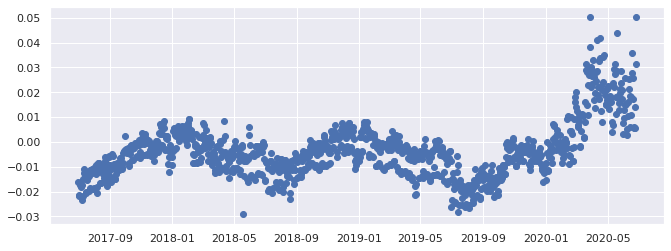

In [312]:
df = data.resample('D', on='Date').mean()
plt.plot( df.loc['2017':'2020','bitrate'], 'o', )

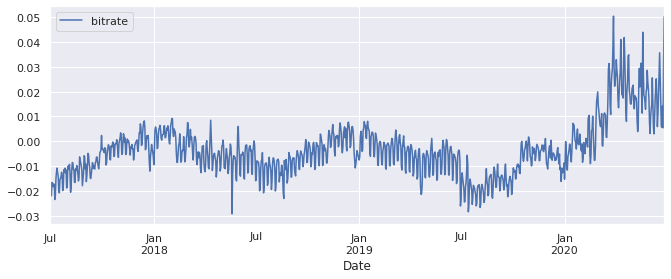

In [313]:
df.plot( y='bitrate')


In [223]:
data[data.Date == '2005']

,Timestamp,Date,bitrate,IX


In [300]:
    data.to_pickle(os.path.join(RESOURC_PATH, 'all_IXs_preprocessed' + '.pkl'))
    data.to_csv(os.path.join(RESOURC_PATH, 'all_IXs_preprocessed' + '.csv'), sep='\t')
    print('Done saving')

Done saving
